# Data Analysis in Python (Part 2): What Genes are Showing Up?

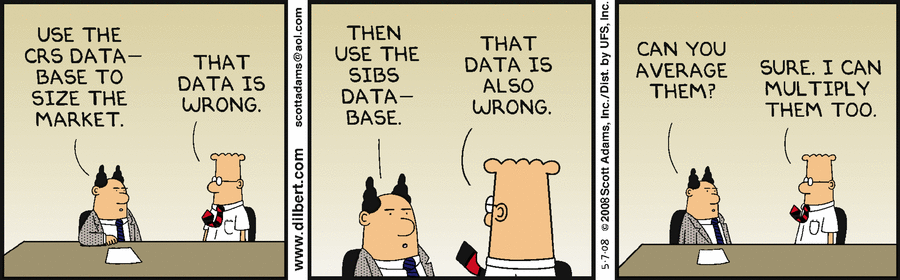

<br>**Summary:** This notebook walks you through the process of extracting significant DESeq genes in python from our DESeq2 analysis. For fun we also include a comparison of our findings against those in the paper and provide a brief glimpse of downregulated processes associated with our findings.

As per usual we need to import our needed packages (and some inline magic):

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Now let's start taking a closer look at our differentially expressed genes. Is there enrichment of certain function and certain pathways?

In [2]:
directory = '~/scratch/featureCounts/' #Lets point to where are files are so we don't need to enter this everytime
deseq2_output = pd.read_csv(directory+"differential_expression.csv",index_col=0) 

#Python Question: Why does directory + differential_expression.csv work?
print(deseq2_output.shape)
deseq2_output.head()

(27626, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000227232.4,35.057738,1.188141,0.376196,3.158300,0.001587,0.003930
ENSG00000233750.3,1.737418,0.832968,0.537997,1.548275,0.121556,NaN
ENSG00000237683.5,60.047232,0.789309,0.289532,2.726155,0.006408,0.014460
ENSG00000241860.2,28.444437,1.029547,0.396797,2.594645,0.009469,0.020815
ENSG00000237094.7,87.548466,0.406872,0.239655,1.697738,0.089557,0.156804


If we are going to do a gene analysis we should get the genes. Let's load a mapping file from the class shared directory:

In [3]:
thatMakesYouChartMan = pd.read_csv("/oasis/tscc/scratch/mstp2020/GeneNameMapping.tsv", sep = "\t", index_col = 0)
maraudersMap = dict(zip(thatMakesYouChartMan.index, thatMakesYouChartMan.GeneName))
thatMakesYouChartMan.head()


,GeneName
ENSG00000223972.4,DDX11L1
ENST00000456328.2,DDX11L1
ENST00000515242.2,DDX11L1
ENST00000518655.2,DDX11L1
ENST00000450305.2,DDX11L1


**Question:** What is happening here? Specifically, what is maraudersMap? Can you come up with another way of doing this? Try to implement a simple way of creating the same structure below:

In [4]:
#Hint: Try iterating through the rows of our loaded in dataframe

Okay now let's use our structure above to add gene names to our summary dataframe:

In [5]:
deseq2_output["GeneName"] = [maraudersMap[i] for i in deseq2_output.index]
print(deseq2_output.shape)
deseq2_output.head()

(27626, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000227232.4,35.057738,1.188141,0.376196,3.158300,0.001587,0.003930,WASH7P
ENSG00000233750.3,1.737418,0.832968,0.537997,1.548275,0.121556,NaN,CICP27
ENSG00000237683.5,60.047232,0.789309,0.289532,2.726155,0.006408,0.014460,AL627309.1
ENSG00000241860.2,28.444437,1.029547,0.396797,2.594645,0.009469,0.020815,RP11-34P13.13
ENSG00000237094.7,87.548466,0.406872,0.239655,1.697738,0.089557,0.156804,RP4-669L17.10


Now that we have our gene names, let's filter our dataframe to look only at clasically significant (i.e., p < 0.05) genes

In [6]:
sigGenes = deseq2_output[deseq2_output['padj'] < 0.05]
print("The dimensions of our summary dataframe after significance filtering is {}".format(sigGenes.shape))
sigGenes.head()

The dimensions of our summary dataframe after significance filtering is (12065, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000227232.4,35.057738,1.188141,0.376196,3.158300,1.586919e-03,3.929791e-03,WASH7P
ENSG00000237683.5,60.047232,0.789309,0.289532,2.726155,6.407699e-03,1.445967e-02,AL627309.1
ENSG00000241860.2,28.444437,1.029547,0.396797,2.594645,9.468862e-03,2.081530e-02,RP11-34P13.13
ENSG00000225972.1,47.046931,-0.723833,0.301943,-2.397247,1.651880e-02,3.462326e-02,MTND1P23
ENSG00000237973.1,2233.870554,0.464851,0.079187,5.870290,4.350329e-09,1.731337e-08,hsa-mir-6723


What is happening here? Well we are relying on in-built pandas mechanisms to filter the dataframe based on a p-value threshold. Pandas dataframe operations should become like a second language to you (or maybe even a first language) as you continue in bioinformatics analyses.

Okay we've got our filtered dataframe, let's checkpoint our results so dar by saving this _sigGenes_ dataframe to a csv file.

In [7]:
sigGenes.to_csv(directory + 'sig_diff_expr_gene.csv')

**Question:** We know our saved dataframe of significant differentially expressed genes is 12065 rows long. How would we check this from the command-line? See if you can put your Linux skills to work and try that below.

 - Note: The below cell is utilizes cell magics to create a bash cell in jupyter notebooks. So try not to change the %%bash at the top of the cell.

In [8]:
%%bash

cd ~/scratch/featureCounts #Lets jump to where we saved our file

#What do you need to type here to get the number of rows?

### Visualization: How is fold change distributed for our significant genes?

Time to leverage matplotlib and seaborn to visualize what our data looks like:

Text(0.5, 1.01, 'Log2 Fold Change Distribution')

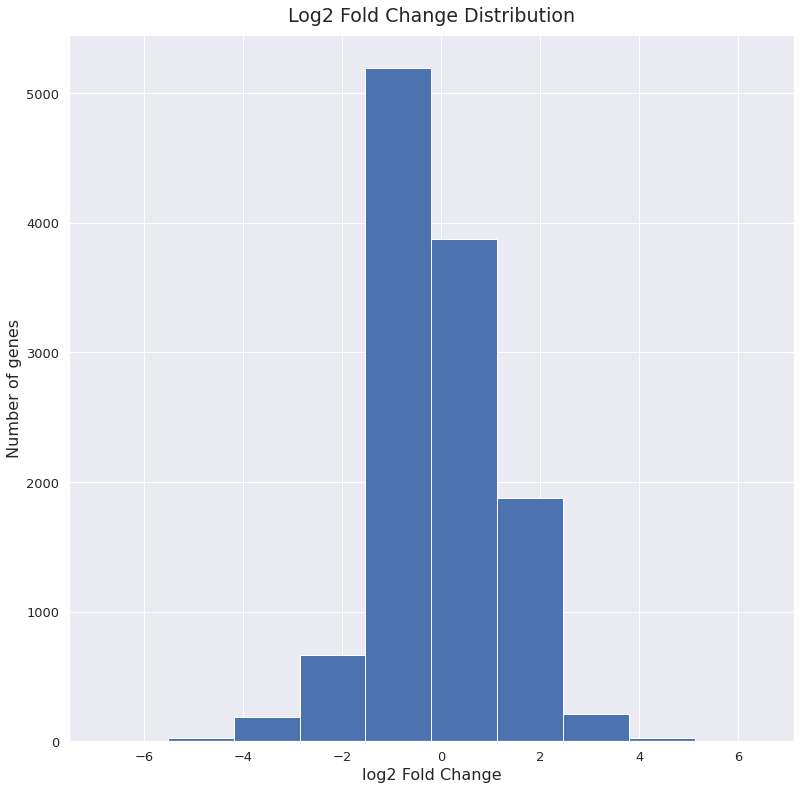

In [9]:
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.1) #Not a big fan of the default matplot lib visualization so let's take advantage of seaborn
plt.hist(sigGenes["log2FoldChange"])
#Let's format things so that we can view text better
plt.xlabel("log2 Fold Change", fontsize = 16)
plt.ylabel("Number of genes", fontsize=16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Log2 Fold Change Distribution", y = 1.01, fontsize = 19)

What if we look at upregulated and downregulated genes specifically? To start let's sort by log2FoldChange

In [10]:
sortedSigGenes = sigGenes.sort_values(by="log2FoldChange",ascending=False)
sortedSigGenes.head(10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000243137.3,1316.962301,6.459929,0.219302,29.456716,1.032785e-190,1.037545e-188,PSG4
ENSG00000165323.11,119.236843,5.523806,0.454921,12.142354,6.298741e-34,7.128645e-33,FAT3
ENSG00000233251.3,545.409366,5.447516,0.240798,22.622788,2.586107e-113,1.296346e-111,AC007743.1
ENSG00000167754.8,96.470359,5.423687,0.477644,11.355075,6.997987e-30,7.012926e-29,KLK5
ENSG00000140465.9,4411.386446,5.361989,0.101140,53.015292,0.000000e+00,0.000000e+00,CYP1A1
ENSG00000130635.11,2552.499033,5.354718,0.234120,22.871681,8.894050e-116,4.551815e-114,COL5A1
ENSG00000055813.5,153.950568,5.118287,0.378915,13.507746,1.407658e-41,1.977200e-40,CCDC85A
ENSG00000167552.9,1704.835510,4.889010,0.125098,39.081584,0.000000e+00,0.000000e+00,TUBA1A
ENSG00000151025.9,120.638442,4.771684,0.389261,12.258326,1.515988e-34,1.744029e-33,GPR158
ENSG00000183036.6,73.027777,4.732230,0.458054,10.331170,5.093548e-25,4.335554e-24,PCP4


In [11]:
sortedSigGenes.tail(10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000137648.12,175.605934,-4.511342,0.244542,-18.448108,5.400252e-76,1.613598e-74,TMPRSS4
ENSG00000164611.8,1010.310574,-4.535571,0.111858,-40.547488,0.000000e+00,0.000000e+00,PTTG1
ENSG00000131050.6,81.080950,-4.568226,0.344757,-13.250566,4.478122e-40,6.056506e-39,BPIFA2
ENSG00000078898.6,506.140406,-4.670869,0.158031,-29.556639,5.395941e-192,5.511536e-190,BPIFB2
ENSG00000175832.8,473.111241,-4.682506,0.160152,-29.237843,6.409992e-188,6.284366e-186,ETV4
ENSG00000204983.8,37.559086,-5.008586,0.490489,-10.211407,1.762889e-24,1.471807e-23,PRSS1
ENSG00000198535.5,530.330022,-5.126825,0.165720,-30.936626,3.844693e-210,4.534137e-208,C2CD4A
ENSG00000007306.10,589.279622,-5.435054,0.167691,-32.411078,1.916195e-230,2.570228e-228,CEACAM7
ENSG00000198074.5,87.849161,-5.465960,0.391036,-13.978153,2.119169e-44,3.197352e-43,AKR1B10
ENSG00000137975.7,845.528916,-6.859946,0.204884,-33.482153,8.766735e-246,1.329277e-243,CLCA2


A fun exercise to do is to see how our results compare to the published data. Let's look at the Fold Changes that were calculated in Extended Data Table 1.

In [12]:
#define the genes from extended data table 1: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5933935/
genes=["VIM","FN1","ZEB1","ZEB2","TWIST1","TWIST2","SNAI1","SNAI2","CDH2","CDH1","CLDN4","CLDN7","TJP3","MUC1","CD133","CD44"]

In [13]:
crissCross = deseq2_output[deseq2_output["GeneName"].isin(genes)]
print("DF filtered down to dimensions of {}".format(crissCross.shape))
crissCross.head()

DF filtered down to dimensions of (14, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000185499.12,4469.766647,-0.379246,0.141143,-2.686966,7.210437e-03,1.616059e-02,MUC1
ENSG00000115414.14,432.896559,0.946260,0.123922,7.635925,2.242042e-14,1.207962e-13,FN1
ENSG00000233608.2,5.686722,-0.410441,0.591182,-0.694272,4.875116e-01,6.165751e-01,TWIST2
ENSG00000122691.8,1080.700112,2.812009,0.099019,28.398632,2.102315e-177,1.973912e-175,TWIST1
ENSG00000189143.8,14730.499264,-0.568705,0.053883,-10.554360,4.849324e-26,4.281436e-25,CLDN4


But wait our results are in log2FoldChange while the Extended Data Table 1 results are reported in un-transformed fold change! So to compare our findings against those of the paper, let's add a column to our intersection dataframe for actual fold change.

In [14]:
#convert log2FoldChange to FoldChange
crissCross["FoldChange"] = crissCross["log2FoldChange"].apply(lambda x: 2**float(x))
crissCross

/home/ucsd-train58/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName,FoldChange
ENSG00000185499.12,4469.766647,-0.379246,0.141143,-2.686966,7.210437e-03,1.616059e-02,MUC1,0.768839
ENSG00000115414.14,432.896559,0.946260,0.123922,7.635925,2.242042e-14,1.207962e-13,FN1,1.926872
ENSG00000233608.2,5.686722,-0.410441,0.591182,-0.694272,4.875116e-01,6.165751e-01,TWIST2,0.752393
ENSG00000122691.8,1080.700112,2.812009,0.099019,28.398632,2.102315e-177,1.973912e-175,TWIST1,7.022618
ENSG00000189143.8,14730.499264,-0.568705,0.053883,-10.554360,4.849324e-26,4.281436e-25,CLDN4,0.674222
ENSG00000019549.4,2.964924,1.007705,0.592009,1.702180,8.872172e-02,1.555162e-01,SNAI2,2.010710
ENSG00000026025.9,1140.431455,3.797428,0.114309,33.220827,5.387382e-242,7.922698e-240,VIM,13.904000
ENSG00000148516.17,11.729955,-0.773070,0.504035,-1.533763,1.250879e-01,2.092541e-01,ZEB1,0.585171
ENSG00000026508.12,1279.174807,1.128382,0.079494,14.194569,9.899324e-46,1.536315e-44,CD44,2.186134
ENSG00000039068.14,30563.445711,-0.757848,0.043686,-17.347622,2.055804e-67,5.305104e-66,CDH1,0.591378


We now have fold change! We see things line-up pretty closely (though not exactly). For example we see SNAI1 in the paper has a reported FC of 0.3 and our analysis shows 0.312975. 

Finally let's get a high-level sense of the pathway view of things by looking at GO ontology. For example let's get a list of downregulated genes to input into [GO ontology](http://geneontology.org/) and see what pops up.

In [15]:
for x in sigGenes[sigGenes["log2FoldChange"] <= -2]["GeneName"]:
    print(x)

ACOT7
C1orf64
PADI3
ACTL8
E2F2
SFN
NR0B2
GPR3
IFI6
CLSPN
CDCA8
MFSD2A
CDC20
KIF2C
RAD54L
DMBX1
STIL
CDKN2C
ORC1
DEPDC1
RP4-694A7.2
CLCA2
CDC7
RP5-1033H22.2
FNDC7
GPSM2
KCND3
FAM46C
HMGCS2
FAM72B
FAM72D
SV2A
ECM1
S100A9
S100A8
S100A14
CKS1B
IQGAP3
CRABP2
NUF2
RP1-35C21.1
RGS16
BRINP3
ASPM
RP11-32D17.4
KIF14
FMOD
SLC45A3
FAM72A
NEK2
DTL
CENPF
HHIPL2
KMO
EXO1
ZNF695
AC011747.3
RRM2
C2orf48
MYCN
CENPO
CENPA
LBH
MAL
AC008268.1
NCAPH
FAM178B
FHL2
BUB1
CKAP2L
MCM6
CXCR4
SLC4A10
SPC25
DHRS9
LRP2
CDCA7
AC020571.3
SGOL2
AOX1
ABCA12
KCNE4
HJURP
GBX2
DTYMK
FANCD2
SGOL1
VILL
KIF15
CCRL2
CDC25A
CAMP
SPINK8
TRAIP
SLC38A3
POC1A
ACOX2
KIAA1524
POLQ
CSTA
ADCY5
RP11-206M11.7
TM4SF18
TM4SF1
PLCH1
SMC4
ECT2
ATP5G1P4
SOX2
ETV5
RPL39L
ZNF876P
RP11-478C6.5
ZNF732
TACC3
AC016773.1
S100P
NCAPG
RHOH
NMU
SULT1E1
PARM1
IGBP1P4
SLC39A8
CENPE
MAD2L1
CCNA2
PLK4
CLGN
MND1
RP11-294O2.2
GALNT7
NEIL3
MLF1IP
TRIP13
RP11-325I22.2
PLK2
DEPDC1B
CENPK
CCNB1
CENPH
VCAN
NR2F1
STARD4
LMNB1
SLC12A2
SOWAHA
KIF20A
GFRA3
CDC25C
EGR1